## Question 1a) 

### Random Forest Classifier : Perform Classification on IRIS DATASET using Random Forest Classifier.

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

## Loading the data

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Creating a separate target variable

In [7]:
Y = df.species
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [8]:
Y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
Y = Y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

## Dropping the target variable: Species

In [10]:
df.drop('species', inplace=True, axis=1)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
X = df

## Visualizing and analyzing the data

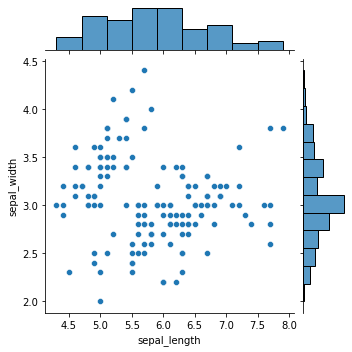

In [13]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, height=5)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

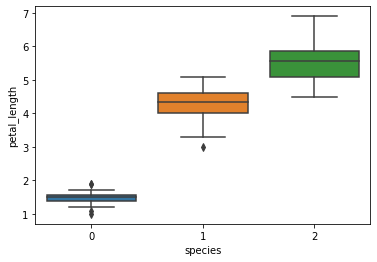

In [14]:
sns.boxplot(x=Y, y="petal_length", data=df )

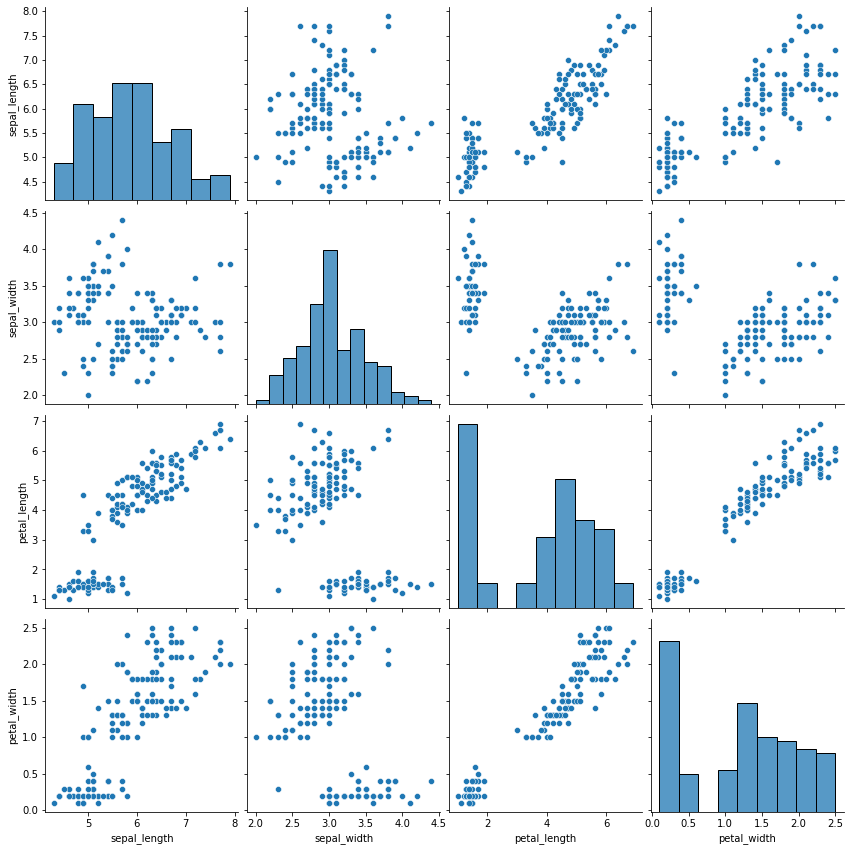

In [15]:
sns.pairplot(X, height=3)

# Splitting the dataset into training and test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [17]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


## Training Random forest Classification on training set

In [18]:
classifier = RandomForestClassifier(criterion='gini', n_estimators=10, random_state=0)

In [19]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

## Predicting the test results

In [20]:
y_pred = classifier.predict(X_test)

## Confusion Matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


## Accuracy of the model

In [22]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## Example (Prediction)

In [24]:
def predictor(test):
    pred = classifier.predict(test)
    if pred == 0:
        print("Predicted Species: Setosa")
    elif pred == 1:
        print("Predicted Species: Versicolor")
    elif pred == 2:
        print("Predicted Species: Virginica")

In [25]:
sl = 9.0                                       #Sepal length
sw = 4.5                                       #Sepal width
pl = 1.0                                       #Petal length
pw = 3.2                                       #Petal width
testingVar = np.array([[sl, sw, pl, pw]])
print(testingVar)

[[9.  4.5 1.  3.2]]


In [26]:
predictor(testingVar)

Predicted Species: Virginica


C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
